In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_bloch_multivector
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Number of qubits
nqubits = 3

#Apply Hadamard gate to put qubits into superposition state
base_qc = QuantumCircuit(nqubits, nqubits)
base_qc.h(range(nqubits))

#Define a parameter for the rotation gate
theta = Parameter('θ')

#Apply rotation gate
base_qc.rx(theta, range(nqubits))

#Apply Cz gate
base_qc.cz(0, 1)
base_qc.cz(1, 2)

#Measure the qubits
base_qc.measure(range(nqubits), range(nqubits))

#Use Qiskit's simulator backend
simulator = Aer.get_backend('qasm_simulator')

#Number of points to use in the Monte Carlo simulation
num_points = 50000

#Number of points that fall within the circle
inside_circle = 0

#Array to keep track of the estimate of Pi at each step
pi_estimates = []

#Repeat the quantum simulation num_points times
for i in range(num_points):
    # Create a new quantum circuit for this iteration
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * i / num_points})

    #Execute the quantum circuit to generate random numbers
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts:
        x = int(key, 2) / 2**nqubits

    #Create another quantum circuit for the y-coordinate
    qc = base_qc.copy()

    # Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * (i+0.5) / num_points})

    #Execute the quantum circuit to generate another random number
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts:
        y = int(key, 2) / 2**nqubits

    #If the point falls within the circle, increment the counter
    if x**2 + y**2 <= 1:
        inside_circle += 1

    #Use the Monte Carlo method to estimate the value of Pi
    pi_estimate = 4 * inside_circle / (i+1)
    pi_estimates.append(pi_estimate)

In [3]:
print(f"Final estimated value of Pi: {pi_estimate}")

Final estimated value of Pi: 3.50088


# Explanation:

The approximation for Pi is based on the Monte Carlo method, a statistical technique using random sampling to yield numerical results. In this case, it's used to estimate the area of a circle inscribed within a square.

The accuracy of the Monte Carlo method increases with the number of samples, but it's still an approximation with a degree of uncertainty.

In the quantum computation-based approach, the precision also depends on the quality of quantum computations. Qubits are subject to various sources of noise like quantum decoherence, which can cause inaccuracies.

Another source of approximation error is the binary representation used to encode the random numbers. With a finite number of qubits, it's impossible to represent all real numbers in the [0, 1] interval exactly.

The number of points defined for the quantum simulation affects the precision of the Pi estimate as well. More points generally lead to a more accurate estimate, but they also require more computational resources and time.

Thus, while the quantum Monte Carlo method provides a useful approximation for Pi, it's essential to remember that it's an estimate influenced by the randomness of the Monte Carlo method and the limitations of quantum computations.


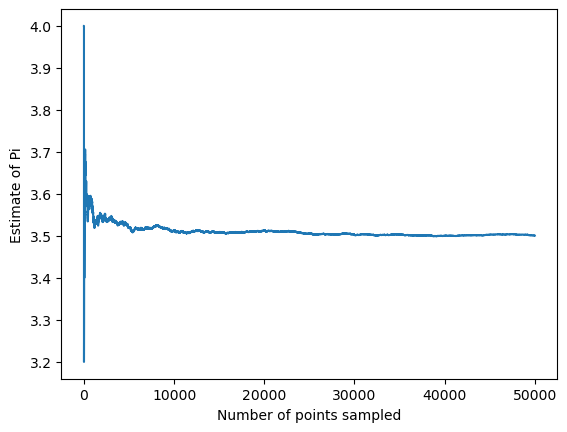

In [4]:
#Plot the estimate of Pi as a function of the number of points sampled
plt.plot(pi_estimates)
plt.xlabel('Number of points sampled')
plt.ylabel('Estimate of Pi')
plt.show()

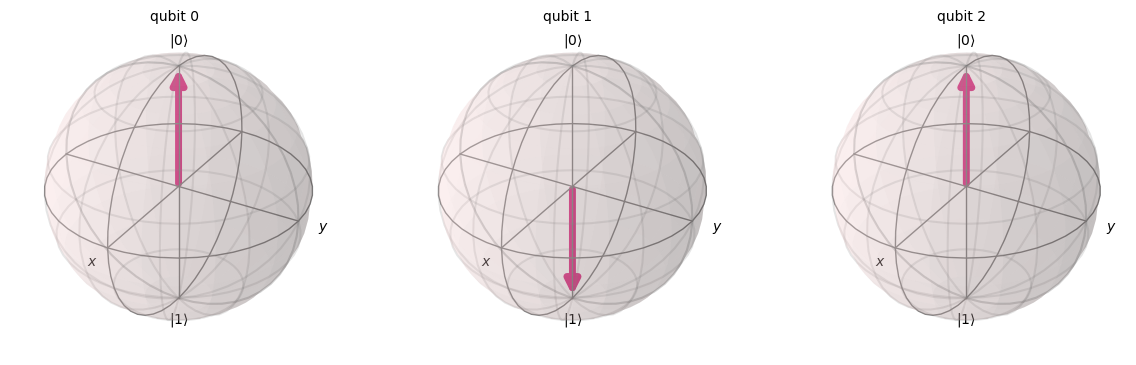

In [5]:
from qiskit import BasicAer

#use BasicAer's statevector_simulator
statevector_simulator = BasicAer.get_backend('statevector_simulator')

#Execute the quantum circuit
job = execute(qc, statevector_simulator)
result = job.result()

#get the state vector
psi  = result.get_statevector(qc)

#plot the state vector
plot_bloch_multivector(psi)


In [6]:
from matplotlib import pyplot as plt
fig = qc.draw('mpl')
plt.show(fig)

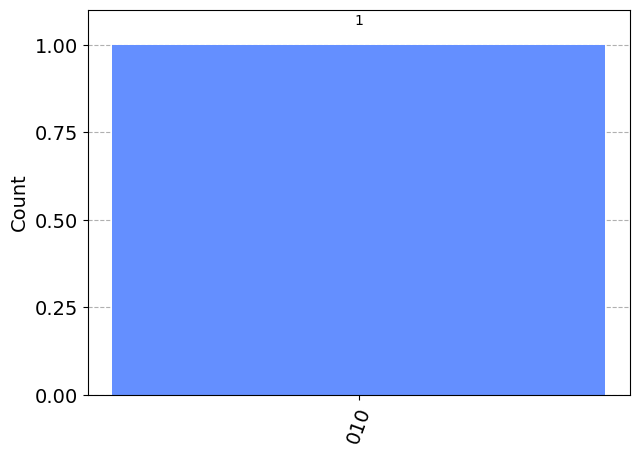

In [7]:
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(qc))

Estimated value of Pi: 3.50088


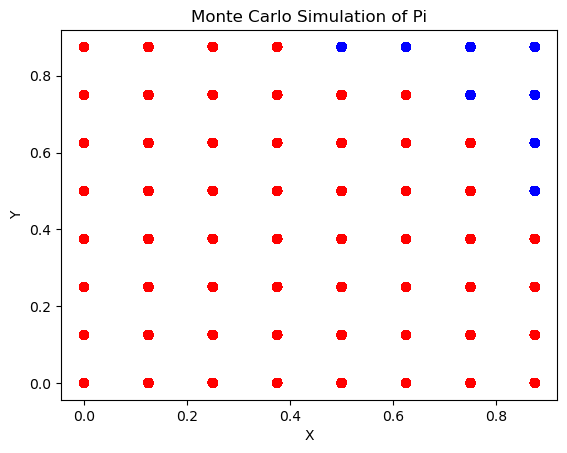

In [8]:
import matplotlib.pyplot as plt

#Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)

#Apply Hadamard and CNOT gates
qc.h([0,1,2])
qc.cx(0, 1)
qc.cx(1, 2)

#Measure the qubits
qc.measure([0,1,2], [0,1,2])

#Use Qiskit's simulator backend
simulator = Aer.get_backend('qasm_simulator')

#Number of points to use in the Monte Carlo simulation
num_points = 100000

#Number of points that fall within the circle
inside_circle = 0

#Lists to hold x and y values for the scatter plot
x_values = []
y_values = []
colors = []

#Repeat the quantum simulation num_points times
for _ in range(num_points):
    #Execute the quantum circuit to generate random numbers
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts:
        x = int(key, 2) / 2**3

    #Execute the quantum circuit again to generate another random number
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts:
        y = int(key, 2) / 2**3

    #Save the x and y values
    x_values.append(x)
    y_values.append(y)

    #If the point falls within the circle, increment the counter
    if x**2 + y**2 <= 1:
        inside_circle += 1
        colors.append('red')
    else:
        colors.append('blue')

#Use the Monte Carlo method to estimate the value of Pi
pi_estimate = 4 * inside_circle / num_points
print(f"Estimated value of Pi: {pi_estimate}")

#Create a scatter plot of the points
plt.scatter(x_values, y_values, color=colors)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Monte Carlo Simulation of Pi")
plt.show()


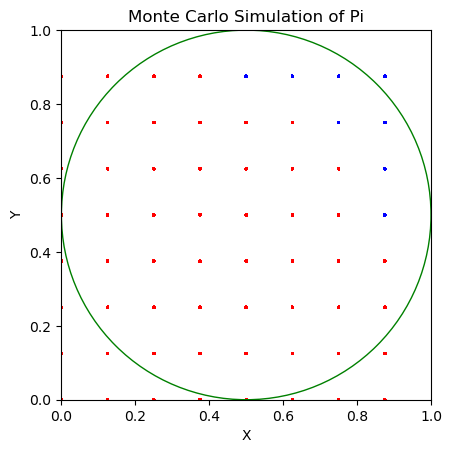

In [9]:
circle = plt.Circle((0.5, 0.5), 0.5, color='g', fill=False)
fig, ax = plt.subplots()
ax.add_artist(circle)
ax.scatter(x_values, y_values, color=colors, s=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', 'box')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Monte Carlo Simulation of Pi")
plt.show()

Quantum Circuit:


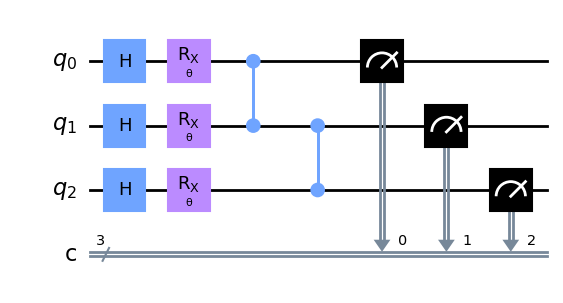

In [10]:
#Number of qubits
nqubits = 3

#Apply Hadamard gate to put qubits into superposition state
base_qc = QuantumCircuit(nqubits, nqubits)
base_qc.h(range(nqubits))

#Define a parameter for the rotation gate
theta = Parameter('θ')

#Apply rotation gate
base_qc.rx(theta, range(nqubits))

#Apply Cz gate
base_qc.cz(0, 1)
base_qc.cz(1, 2)

#Measure the qubits
base_qc.measure(range(nqubits), range(nqubits))

#Print the circuit before running the simulation
print("Quantum Circuit:")
display(base_qc.draw(output="mpl", fold=20))

#Use Qiskit's simulator backend
simulator = Aer.get_backend('qasm_simulator')

#Number of points to use in the Monte Carlo simulation
num_points = 100000

#Number of points that fall within the circle
inside_circle = 0

#Array to keep track of the estimate of Pi at each step
pi_estimates = []

#Repeat the quantum simulation num_points times
for i in range(num_points):
    #Create a new quantum circuit for this iteration
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * i / num_points})

    #Execute the quantum circuit to generate random numbers
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts:
        x = int(key, 2) / 2**nqubits

    #Create another quantum circuit for the y-coordinate
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * (i+0.5) / num_points})

    #Execute the quantum circuit to generate another random number
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts:
        y = int(key, 2) / 2**nqubits

    #If the point falls within the circle, increment the counter
    if x**2 + y**2 <= 1:
        inside_circle += 1

    #Use the Monte Carlo method to estimate the value of Pi
    pi_estimate = 4 * inside_circle / (i+1)
    pi_estimates.append(pi_estimate)


In [12]:
from qiskit import transpile
import time

#Number of qubits
nqubits = 6

#Apply Hadamard gate to put qubits into superposition state
base_qc = QuantumCircuit(nqubits, nqubits)
base_qc.h(range(nqubits))

#Define a parameter for the rotation gate
theta = Parameter('θ')

#Apply rotation gate
base_qc.rx(theta, range(nqubits))

#Apply Cz gate
for i in range(nqubits - 1):
    base_qc.cz(i, i + 1)

#Additional Hadamard gates for better random distribution
base_qc.h(range(nqubits))

#Measure the qubits
base_qc.measure(range(nqubits), range(nqubits))

#Number of points to use in the Monte Carlo simulation
num_points = 20000  # Increase the number of points

#Number of points that fall within the circle
inside_circle = 0

#Array to keep track of the estimate of Pi at each step
pi_estimates = []

#Set a maximum time limit (in seconds)
max_time = 6 * 60 * 60  # 6 hours
start_time = time.time()

#Repeat the quantum simulation num_points times
for i in range(num_points):
    #Create a new quantum circuit for this iteration
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * i / num_points})

    #Execute the quantum circuit to generate random numbers
    transpiled_circ = transpile(qc, simulator)
    job1 = simulator.run(transpiled_circ, shots=1)

    #Create another quantum circuit for the y-coordinate
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * (i+0.5) / num_points})

    #Execute the quantum circuit to generate another random number
    transpiled_circ = transpile(qc, simulator)
    job2 = simulator.run(transpiled_circ, shots=1)

    result1 = job1.result()
    result2 = job2.result()

    counts1 = result1.get_counts()
    counts2 = result2.get_counts()

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts1:
        x = int(key, 2) / 2**nqubits

    for key in counts2:
        y = int(key, 2) / 2**nqubits

    #If the point falls within the circle, increment the counter
    if x**2 + y**2 <= 1:
        inside_circle += 1

    #Use the Monte Carlo method to estimate the value of Pi
    pi_estimate = 4 * inside_circle / (i+1)
    pi_estimates.append(pi_estimate)

    #Break if it has been running for too long
    if time.time() - start_time > max_time:
        print(f"Execution time exceeded {max_time} seconds. Stopping.")
        break

print(f"Final estimated value of Pi: {pi_estimate}")


Final estimated value of Pi: 3.2076


Quantum Circuit:


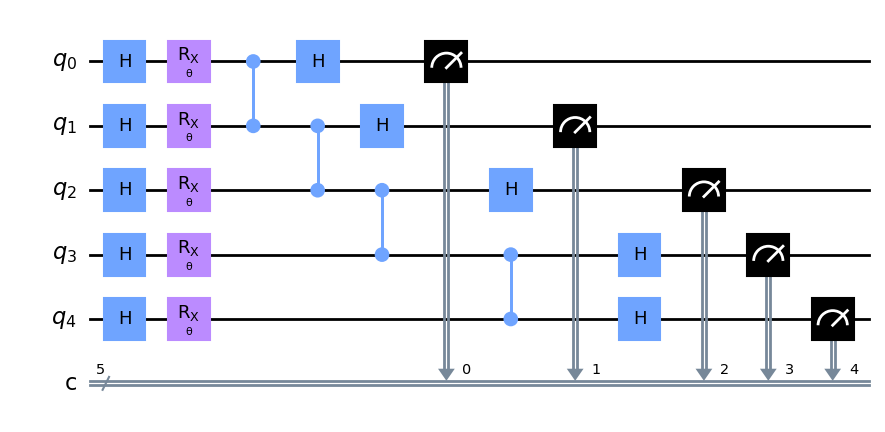

Final estimated value of Pi: 3.104


In [13]:
#Number of qubits
nqubits = 5

#Apply Hadamard gate to put qubits into superposition state
base_qc = QuantumCircuit(nqubits, nqubits)
base_qc.h(range(nqubits))

#Define a parameter for the rotation gate
theta = Parameter('θ')

#Apply rotation gate
base_qc.rx(theta, range(nqubits))

#Apply Cz gate
for i in range(nqubits - 1):
    base_qc.cz(i, i + 1)

#Additional Hadamard gates for better random distribution
base_qc.h(range(nqubits))

#Measure the qubits
base_qc.measure(range(nqubits), range(nqubits))

#Print the circuit before running the simulation
print("Quantum Circuit:")
display(base_qc.draw(output="mpl", fold=20))

#Number of points to use in the Monte Carlo simulation
num_points = 500  # Reduced the number of points

#Number of points that fall within the circle
inside_circle = 0

#Array to keep track of the estimate of Pi at each step
pi_estimates = []

#Repeat the quantum simulation num_points times
for i in range(num_points):
    #Create a new quantum circuit for this iteration
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * i / num_points})

    #Execute the quantum circuit to generate random numbers
    transpiled_circ = transpile(qc, simulator)
    job1 = simulator.run(transpiled_circ, shots=1)

    #Create another quantum circuit for the y-coordinate
    qc = base_qc.copy()

    #Set the value of theta for this iteration
    qc = qc.bind_parameters({theta: np.pi * (i+0.5) / num_points})

    #Execute the quantum circuit to generate another random number
    transpiled_circ = transpile(qc, simulator)
    job2 = simulator.run(transpiled_circ, shots=1)

    result1 = job1.result()
    result2 = job2.result()

    counts1 = result1.get_counts()
    counts2 = result2.get_counts()

    #Convert the binary result to a decimal number between 0 and 1
    for key in counts1:
        x = int(key, 2) / 2**nqubits

    for key in counts2:
        y = int(key, 2) / 2**nqubits

    #If the point falls within the circle, increment the counter
    if x**2 + y**2 <= 1:
        inside_circle += 1

    #Use the Monte Carlo method to estimate the value of Pi
    pi_estimate = 4 * inside_circle / (i+1)
    pi_estimates.append(pi_estimate)

print(f"Final estimated value of Pi: {pi_estimate}")

# Explanation:

The variation in the approximation of Pi is mainly due to the number of qubits and the number of data points.

The number of qubits used in the circuit (6 and 5 in this case) affects the precision of representation of the random numbers. As we divide by 2^nqubits, the larger the number of qubits, the finer the division, thus allowing a more accurate representation of a number in the [0,1] interval. Hence, reducing the number of qubits can lead to a less precise representation.

The number of data points used for the Monte Carlo method, which was 20,000 and 500 in these two cases, also significantly affects the precision of the Pi estimate. The Monte Carlo method is a statistical technique that becomes more accurate with an increase in sample size. Reducing the number of points used in the simulation would potentially lead to a less precise estimation of Pi. 

Therefore, to maximize the precision of the estimate, it is recommended to use a larger number of qubits and a larger number of data points in the Monte Carlo simulation. However, these increases must be balanced against computational resource limitations and execution time. 
